In [63]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Params
lr = 0.001
batch_size = 10000
SAMPLING_NUM = 1000000
COST_THRESHOLD = 2.78937307e-04

In [2]:
# INIT
params = np.zeros(shape = (3,1))
params[0][0] = 3
params[1][0] = 1
params[2][0] = 2
x_data = np.ones(shape=(SAMPLING_NUM,3)) # 1, x1, x2
y_data = np.zeros(shape = (SAMPLING_NUM, 1)) # y
noise = np.zeros(shape = (SAMPLING_NUM, 1))
noise[:,0] = np.random.normal(0, 1.414, SAMPLING_NUM)
x_data[:,1] = np.random.normal(3, 2, SAMPLING_NUM)
x_data[:,2] = np.random.normal(-1, 2, SAMPLING_NUM)

In [3]:
y_data = np.dot(x_data, params)
# print('BEFORE: ',y_data)
# print('NOiSE: ', noise)
y_data = np.add(y_data, noise)
# print('AFTER: ', y_data)
print(params.T[0].shape)
print(x_data[0].shape)
print(y_data[0])
print(3/2)

(3,)
(3,)
[0.90603451]
1.5


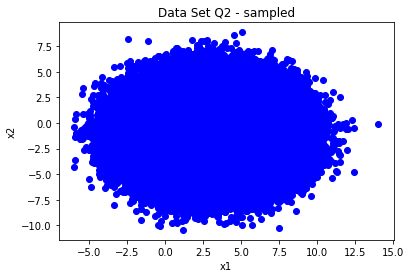

In [4]:
plt.title("Data Set Q2 - sampled") 
plt.xlabel("x1") 
plt.ylabel("x2") 
plt.plot(x_data[:,1], x_data[:,2], "ob")
plt.show()
# print(int(y_data.shape[0]))

In [17]:
def cost(x_data, y_data, params):
    sum = 0
    for i in range(y_data.shape[0]):
        sum = sum + ((1/y_data.shape[0])*(y_data[i]-np.dot(params, x_data[i]))**2)/2
#         print('b')
#     print('Cost: %s \n' % str(sum))
    return sum
#     return False if (sum < 0.1) else True

In [57]:
from os import system
from IPython.display import clear_output
def sgd_main(x_data, y_data):
    m = int(y_data.shape[0])
    r = batch_size
    theta = np.ones(shape = (1, 3))
    epoch = 0
    while(cost(x_data, y_data, theta)>COST_THRESHOLD):
        p = 0
        while(p <= m):    
            clear_output(wait=True)
            print('=================EPOCH %s=================' % epoch)
            for i in range(p, r+p):
                gradient = np.zeros(3)
                for j in range(3):
                    gradient[j] += ((y_data[i] - np.dot(theta, x_data[i])) * x_data[i][j])/r
                    theta[0][j] += lr * gradient[j]
            print('Batch %s out of %s batches\n' % (p/r, m/r))
            print(theta[0])
            p += r
            if(p == m):
                break
#             if(cost(x_data, y_data, theta)<COST_THRESHOLD):
#                 print(theta[0])
#                 break;
            validation_cost = 0
            if(p>0):
                for g in range(p-r,p):
                    validation_cost = validation_cost + ((1/r)*(y_data[g]-np.dot(theta, x_data[g]))**2)/2
            else:
                for g in range((m/r-2)*r,(m/r-1)*r):
                    validation_cost = validation_cost + ((1/r)*(y_data[g]-np.dot(theta, x_data[g]))**2)/2
            print('COST: %s \n' % validation_cost)
            if(validation_cost<COST_THRESHOLD/2):
                break
        epoch+=1

# Observation

# Report

In [ ]:
sgd_main(x_data, y_data)

=================EPOCH 3=================
